## Валидация моделей классификации

Данные

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

%matplotlib inline
np.set_printoptions(precision=4)

df_source = pd.read_csv(
    'data/client_segmentation.csv', 
    dtype={'call_diff': np.float32, 'call_diff': np.float32, 'traffic_diff': np.float32, 'customes_class': np.uint16}
)
df_source[(df_source.customes_class==2) & (df_source.call_diff>1.1)] = 0
df_source[(df_source.customes_class==2) & (df_source.call_diff<=1.1)] = 1
X = df_source[['call_diff','sms_diff','traffic_diff']].values
y = df_source.customes_class.values

df_source.head(5)

,call_diff,sms_diff,traffic_diff,customes_class
0,-0.666421,0.444911,-0.273538,0
1,1.000000,1.000000,1.000000,1
2,-0.841503,0.846665,0.727606,0
3,1.389749,0.390911,1.789246,1
4,1.000000,1.000000,1.000000,1


Найдите лучший классификатор по метрике f1-score

In [99]:
from sklearn.tree  import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import f1_score

    

# --------- ВАШ КОД ТУТ --------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

names = []
scores = []

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print(f'{GaussianNB.__name__}:\t{f1_score(y_test, y_pred):.4f}')
names.append(GaussianNB.__name__)
scores.append(f1_score(y_test, y_pred))

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(f'{DecisionTreeClassifier.__name__}:\t{f1_score(y_test, y_pred):.4f}')
names.append(DecisionTreeClassifier.__name__)
scores.append(f1_score(y_test, y_pred))

knn = KNeighborsClassifier(p=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f'{KNeighborsClassifier.__name__}:\t{f1_score(y_test, y_pred):.4f}')
names.append(KNeighborsClassifier.__name__)
scores.append(f1_score(y_test, y_pred))

lr = LogisticRegression(C=10)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(f'{LogisticRegression.__name__}:\t{f1_score(y_test, y_pred):.4f}')
names.append(LogisticRegression.__name__)
scores.append(f1_score(y_test, y_pred))

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(f'{RandomForestClassifier.__name__}:\t{f1_score(y_test, y_pred):.4f}')
names.append(RandomForestClassifier.__name__)
scores.append(f1_score(y_test, y_pred))

print(f'\nСогласно метрике f1 наилучший классификатор : {names[scores.index(max(scores))]}',
     f'\nдля этой модели метрика f1 = {max(scores):.4f}')



# ------------------------------

GaussianNB:	0.9167
DecisionTreeClassifier:	0.9583
KNeighborsClassifier:	0.9583
LogisticRegression:	0.9796
RandomForestClassifier:	0.9583

Согласно метрике f1 наилучший классификатор : LogisticRegression 
для этой модели метрика f1 = 0.9796


## Валидация моделей линейной регрессии

Пользуясь методом .score подберите наилучшее значение степени полинома

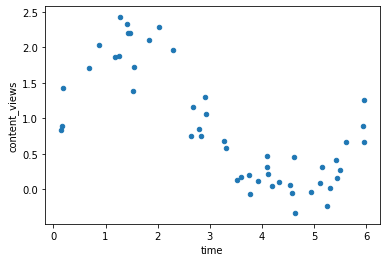

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('data/content_views_toy_set.csv', encoding='utf8')
df.plot.scatter(x='time', y='content_views')
plt.show()

X = df['time'].values
y = df['content_views'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
reg = LinearRegression().fit(X_train.reshape(-1, 1), y_train)


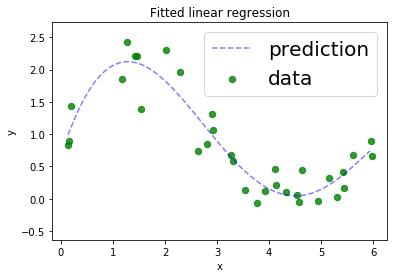

In [5]:
def generate_degrees(source_data: list, degree: int):
    """Функция, которая принимает на вход одномерный массив, а возвращает n-мерный
    Для каждой степени от 1 до  degree возводим x в эту степень
    """
    return np.array([
          source_data**n for n in range(1, degree + 1)  
    ]).T

X_train_5 = generate_degrees(X_train, 5)
X_test_5 = generate_degrees(X_test, 5)
reg_5 = LinearRegression().fit(X_train_5, y_train)

# строим график
margin = 0.3
support = np.arange(X.min(), X.max(), step=0.1)

X_test_support = generate_degrees(support, 5)
y_hat = reg_5.predict(X_test_support)

plt.plot(support, y_hat, 'b--', alpha=0.5, label='prediction')
plt.scatter(X_train, y_train, 40, 'g', 'o', alpha=0.8, label='data')
plt.xlim(X.min() - margin, X.max() + margin)
plt.ylim(y.min() - margin, y.max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('Fitted linear regression')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

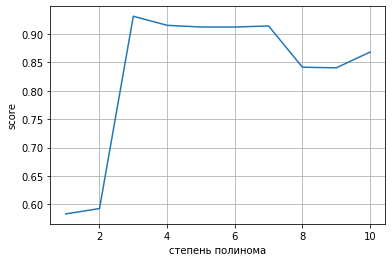

Наилучшее качество модели достигается при степени полинома = 3
Качество модели = 0.9313
Коэффициенты линейной регрессии w = [ 1.9519 -0.9423  0.1039]


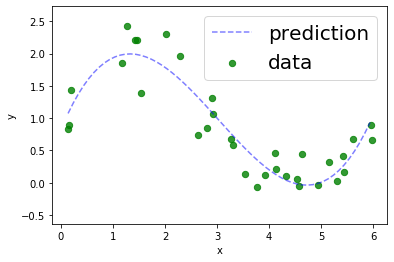

In [28]:
# --------- ВАШ КОД ТУТ --------
score_list = []
for i in range(1, 11):
    X_train_i = generate_degrees(X_train, i)
    X_test_i = generate_degrees(X_test, i)
    reg_i = LinearRegression().fit(X_train_i, y_train)
    y_pred_i = reg_i.predict(X_test_i)
    score_list.append(reg_i.score(X_test_i, y_test))

    
plt.plot(np.arange(1,11), score_list)
plt.grid()
plt.xlabel('степень полинома')
plt.ylabel('score')
plt.show()
    
    
print(f'Наилучшее качество модели достигается при степени полинома = {score_list.index(max(score_list))+1}')
print(f'Качество модели = {max(score_list):.4f}')
X_train_max = generate_degrees(X_train, score_list.index(max(score_list))+1)
reg_max = LinearRegression().fit(X_train_max, y_train)
print(f'Коэффициенты линейной регрессии w = {reg_max.coef_}')

X_test_support = generate_degrees(support, score_list.index(max(score_list))+1)
y_hat = reg_max.predict(X_test_support)

plt.plot(support, y_hat, 'b--', alpha=0.5, label='prediction')
plt.scatter(X_train, y_train, 40, 'g', 'o', alpha=0.8, label='data')
plt.xlim(X.min() - margin, X.max() + margin)
plt.ylim(y.min() - margin, y.max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# ------------------------------